# Code for fine tuning the language model

In [5]:
from datasets import load_dataset
from transformers import BertForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
# Load IMDb dataset
dataset = load_dataset("imdb")

# Load pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

C:\Users\wheus\AppData\Roaming\Python\Python38\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassifi

In [ ]:
# Tokenization function
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

# Apply the tokenization to the entire dataset
encoded_dataset = dataset.map(preprocess_function, batched=True)

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

## Training should be run on google colab as it is a HUGE job

In [ ]:
# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
)

# Start training
trainer.train()

In [ ]:
# Save the fine-tuned model
model.save_pretrained("./fine_tuned_bert_imdb")
tokenizer.save_pretrained("./fine_tuned_bert_imdb")

# 3.1. Give a brief description of the dataset including its purpose, structure, and key characteristics.
See overleaf 

# 3.2. Provide a brief dataset analysis with summary statistics (e.g., number of samples per class) and representative examples to illustrate the data.

In [ ]:
from collections import Counter

# Function to calculate summary statistics
def summarize_dataset(dataset_split):
    num_samples = len(dataset_split)
    label_counts = Counter(dataset_split["label"])
    avg_length = sum(len(review.split()) for review in dataset_split["text"]) / num_samples

    print(f"Number of samples: {num_samples}")
    print(f"Label distribution: {label_counts}")
    print(f"Average review length (in words): {avg_length:.2f}")

# Summary for train and test sets
print("Train Set Summary:")
summarize_dataset(dataset["train"])

print("\nTest Set Summary:")
summarize_dataset(dataset["test"])

In [ ]:
for i in range(2):
    print(f"Example {i+1}:")
    print(f"Text: {dataset['train'][i]['text']}")
    print(f"Label: {dataset['train'][i]['label']}")
    print()

Summary statistics and examples are inserted in text on overleaf

# 3.3) Fine-tune the BERT Model. Fine-tune bert-base-uncased on your dataset using the Trainer API or a custom training loop. Save the fine-tuned model for later use.

Training done on google colab trained model saved to downloads folder

# 3.4) Write a script to extract and visualize attention maps from the last attention layer of the pre-trained (not fine-tuned) model and fine-tuned model.

In [11]:
def plot_attention_map(model, tokenizer, input_sentence, plot_name):
    import matplotlib.pyplot as plt
    import numpy as np

    # Tokenize the input sentence
    inputs = tokenizer(input_sentence, return_tensors="pt")
    outputs = model(**inputs)

    # Extract the attention maps
    attentions = outputs.attentions  # List of attention maps for each layer

    # Get the last layer's attention map (remove batch dimension)
    last_layer_attention = attentions[-1].squeeze(0).detach().numpy()

    # Tokenize input for visualization
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze().tolist())

    # Remove CLS and SEP tokens from tokens and attention maps
    tokens_without_cls_sep = tokens[1:-1]  # Remove [CLS] and [SEP]
    attention_without_cls_sep = last_layer_attention[:, 1:-1, 1:-1]  # Adjust attention matrix

    # Plot attention map for the first head of the last layer
    def plot_attention_one_head(attention, tokens, title):
        fig, ax = plt.subplots(figsize=(10, 10))
        im = ax.imshow(attention, cmap="viridis")
        ax.set_xticks(range(len(tokens)))
        ax.set_yticks(range(len(tokens)))
        ax.set_xticklabels(tokens, rotation=90)
        ax.set_yticklabels(tokens)
        plt.colorbar(im, ax=ax)
        plt.title(title)
        plt.show()

    # Plot the first head of the last layer
    plot_attention_one_head(attention_without_cls_sep[0], tokens_without_cls_sep, plot_name)

In [12]:
# Load pre-trained BERT model and tokenizer
pretrained_model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
fine_tuned_model_name = 'C:\\Users\\wheus\\Downloads\\fine_tuned_bert_imdb\\fine_tuned_bert_imdb'  # Replace with your fine-tuned model path
fine_tuned_model = BertModel.from_pretrained(fine_tuned_model_name, output_attentions=True)

C:\Users\wheus\AppData\Roaming\Python\Python38\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

# 3.5 Use different sentences in the map

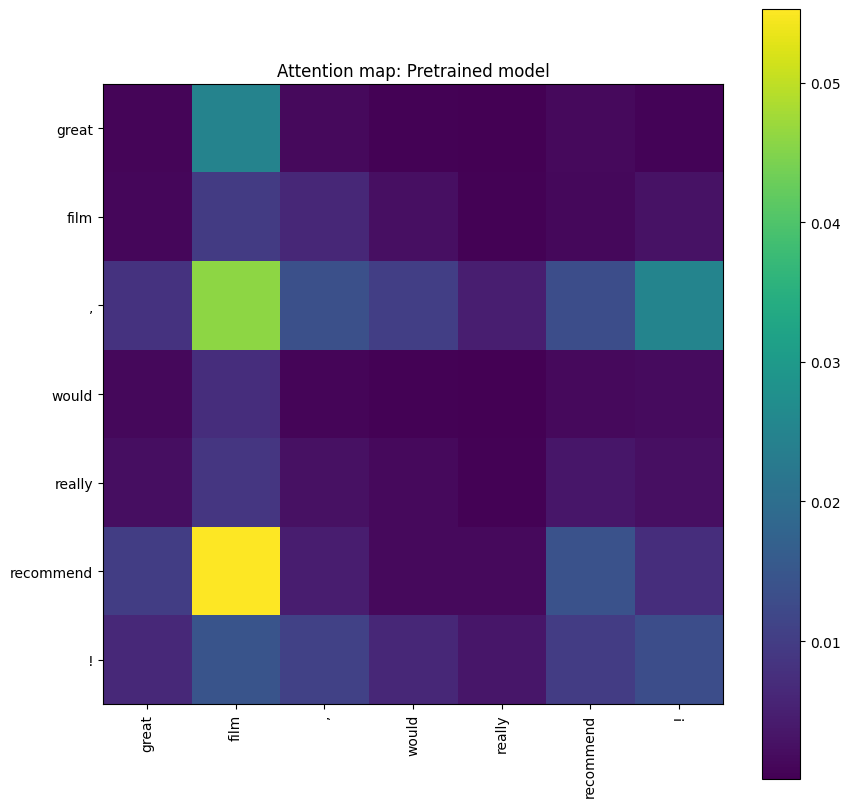

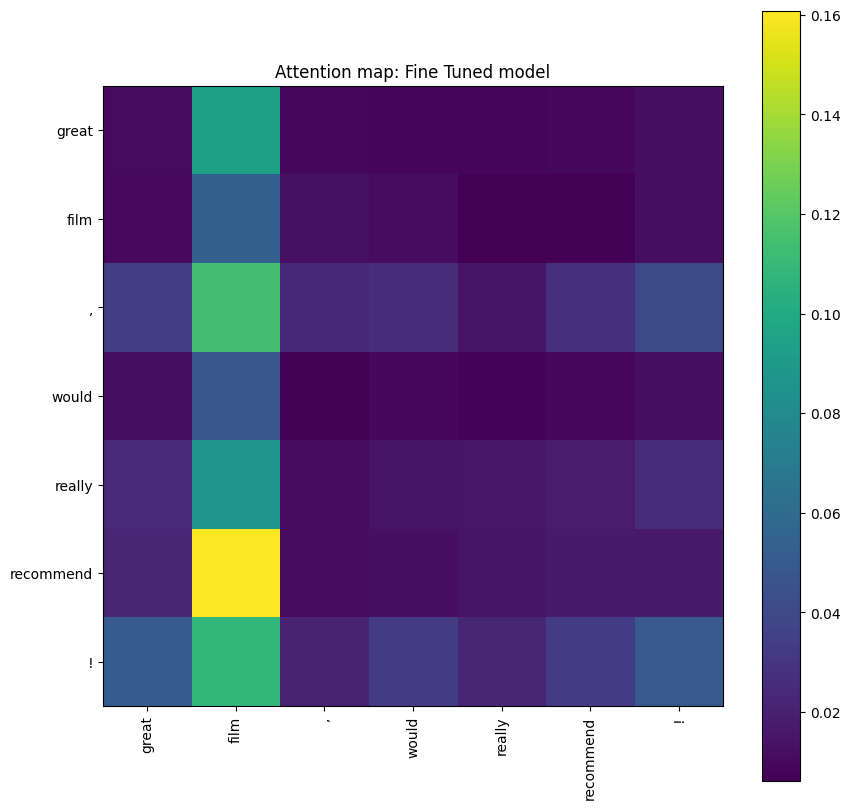

In [13]:
plot_attention_map(pretrained_model, tokenizer, " Great film, would really recommend!", 'Attention map: Pretrained model')
plot_attention_map(fine_tuned_model, tokenizer, " Great film, would really recommend!", 'Attention map: Fine Tuned model')

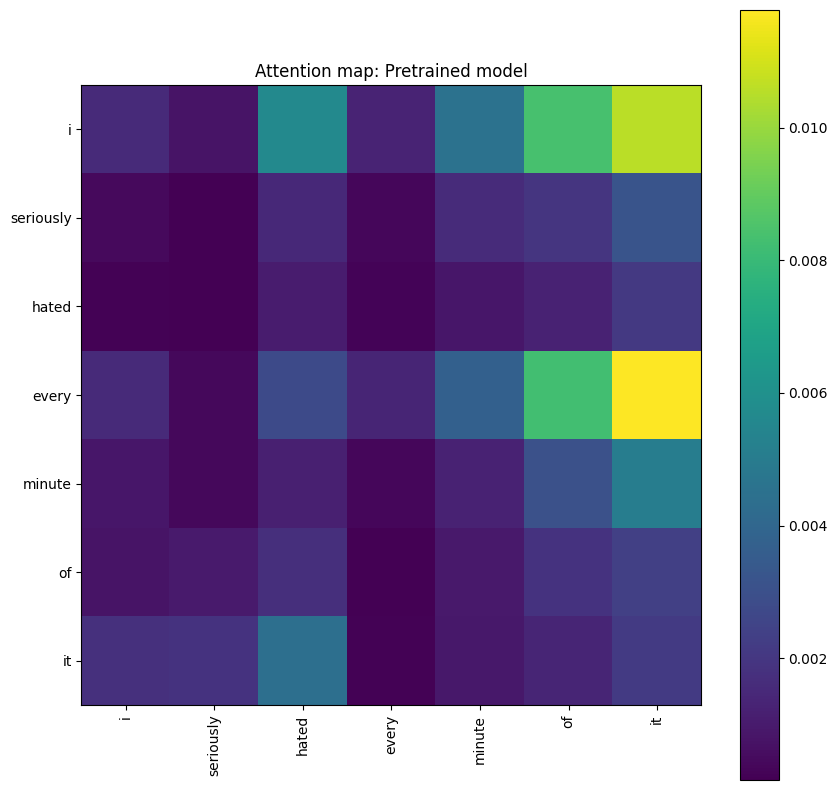

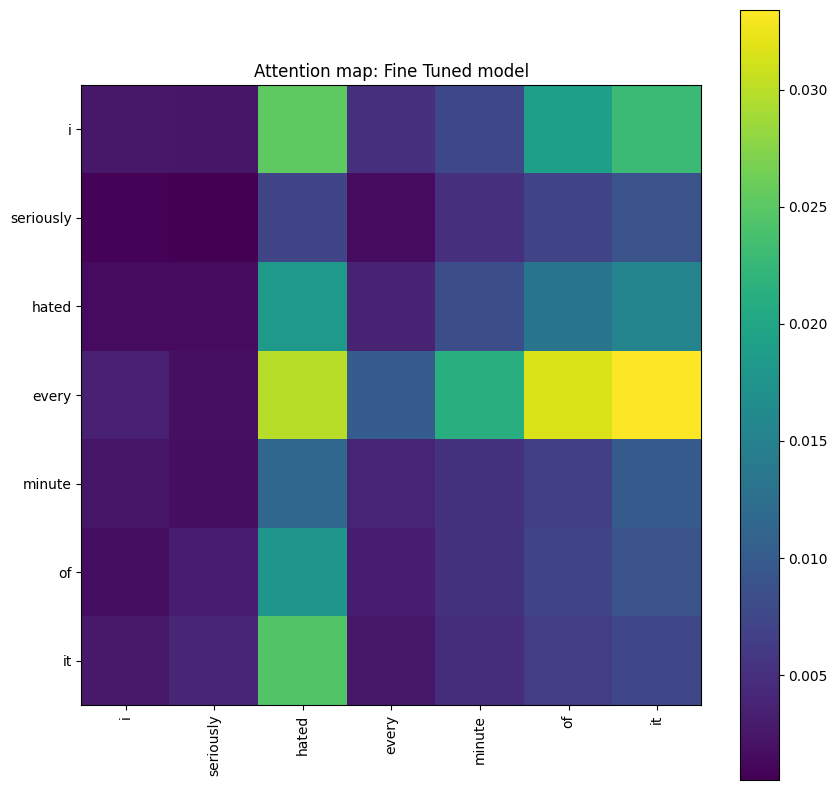

In [14]:
plot_attention_map(pretrained_model, tokenizer, "I seriously hated every minute of it", 'Attention map: Pretrained model')
plot_attention_map(fine_tuned_model, tokenizer, "I seriously hated every minute of it", 'Attention map: Fine Tuned model')